In [1]:
import pandas as pd
import numpy as np
import sys
import os
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

from sklearn.preprocessing import StandardScaler
# Import the function
sys.path.append(os.path.abspath('../src/data'))
#from extract_for_model_new import extract_time_series
#from extract_for_model_new import scale_time_series_all
#from extract_for_model_choosen_shift import extract_time_series_choosen_shift
%matplotlib inline

In [2]:
import pandas as pd
dataset1= pd.read_csv('/home/reference/pivate_public_file.csv')
print(dataset1.head())

   Unnamed: 0      company    year quarter   IQ_EBIT  IQ_TOTAL_OTHER_OPER  \
0           0  IQ102267046  2013.0      Q4  0.088781             1.544846   
1           1  IQ102267046  2014.0      Q4  0.161020             2.177063   
2           2  IQ102267046  2015.0      Q4  0.018564             3.163827   
3           3  IQ105654219  2007.0      Q4 -0.058002             1.405880   
4           4  IQ105654219  2012.0      Q4  0.417684             1.918909   

   IQ_OPER_INC  IQ_TOTAL_REV     TARGET     IQ_AR     IQ_RE  IQ_TOTAL_ASSETS  \
0     0.088781      2.962316   4.305274  2.467916 -0.220824         3.479154   
1     0.161020      4.305274   6.537584  3.671694  0.081069         4.908565   
2     0.018564      6.537584  12.468611  5.159870  0.107997         6.973966   
3    -0.058002      2.912760   4.642862  0.736371 -0.161029         1.867177   
4     0.417684      4.642862   4.957326  1.114145  0.935905         3.141921   

   IQ_PRIV  IQ_PUB  
0        1       0  
1        1    

In [3]:
dataset1 = dataset1.drop('Unnamed: 0',axis=1)

In [4]:
dataset1.head()

,company,year,quarter,IQ_EBIT,IQ_TOTAL_OTHER_OPER,IQ_OPER_INC,IQ_TOTAL_REV,TARGET,IQ_AR,IQ_RE,IQ_TOTAL_ASSETS,IQ_PRIV,IQ_PUB
0,IQ102267046,2013.0,Q4,0.088781,1.544846,0.088781,2.962316,4.305274,2.467916,-0.220824,3.479154,1,0
1,IQ102267046,2014.0,Q4,0.161020,2.177063,0.161020,4.305274,6.537584,3.671694,0.081069,4.908565,1,0
2,IQ102267046,2015.0,Q4,0.018564,3.163827,0.018564,6.537584,12.468611,5.159870,0.107997,6.973966,1,0
3,IQ105654219,2007.0,Q4,-0.058002,1.405880,-0.058002,2.912760,4.642862,0.736371,-0.161029,1.867177,1,0
4,IQ105654219,2012.0,Q4,0.417684,1.918909,0.417684,4.642862,4.957326,1.114145,0.935905,3.141921,1,0


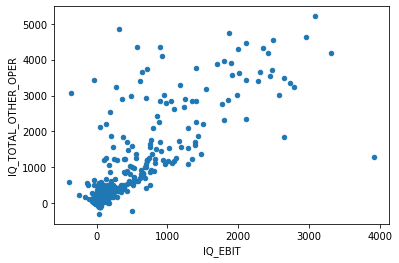

In [5]:
dataset1.plot(kind='scatter',x='IQ_EBIT', y='IQ_TOTAL_OTHER_OPER')

In [6]:
scaler = StandardScaler()

In [7]:
dataset = dataset1.copy()
col_names = ['IQ_OPER_INC', 'IQ_EBIT','IQ_TOTAL_OTHER_OPER','IQ_TOTAL_REV','TARGET','IQ_AR','IQ_RE','IQ_TOTAL_ASSETS']
features = dataset[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
dataset[col_names] = features
print(dataset)

          company    year quarter   IQ_EBIT  IQ_TOTAL_OTHER_OPER  IQ_OPER_INC  \
0     IQ102267046  2013.0      Q4 -0.132574            -0.159024    -0.132574   
1     IQ102267046  2014.0      Q4 -0.132130            -0.156910    -0.132130   
2     IQ102267046  2015.0      Q4 -0.133006            -0.153610    -0.133006   
3     IQ105654219  2007.0      Q4 -0.133478            -0.159489    -0.133478   
4     IQ105654219  2012.0      Q4 -0.130551            -0.157773    -0.130551   
...           ...     ...     ...       ...                  ...          ...   
9458    IQ9817151  2017.0      Q4  0.430714             0.019553     0.430714   
9459    IQ9950803  2017.0      Q4 -0.132640            -0.163635    -0.132640   
9460   IQ99552165  2017.0      Q4 -0.088098            -0.120880    -0.088098   
9461   IQ99715630  2017.0      Q4 -0.138595            -0.149694    -0.138595   
9462     IQ997213  2017.0      Q4 -0.044490             0.191511    -0.044490   

      IQ_TOTAL_REV    TARGE

In [8]:
inertia = [] # List of the inertia score for each cluster and plot the elbow curve(a measure of how internally coherent clusters are.)
sil = [] # List the silhouette score
    

X = dataset.loc[:,'IQ_EBIT':'IQ_TOTAL_ASSETS']
for i in range(2,11):
    #plt.figure(figsize=(6, 6))
    
    # Predicting the clusters
    
    y_pred = KMeans(n_clusters=i, init = 'random', random_state = 2)
    y_pred.fit(X)
    cluster_label = y_pred.predict(X)
    inertia.append([i,y_pred.inertia_])
    sil.append((i, silhouette_score(X, cluster_label)))
    #print(type(cluster_label))from sklearn.metrics import silhouette_samples, silhouette_score

Text(0.5, 1.0, 'Silhouetter Score Curve')

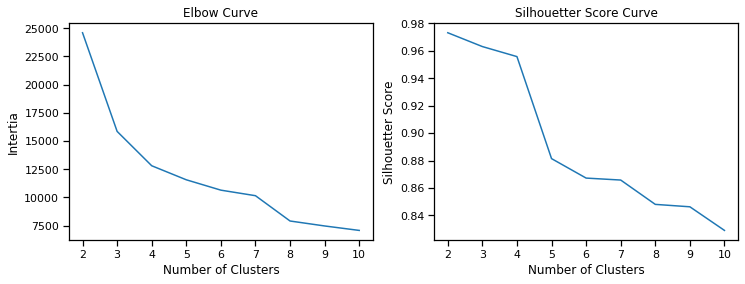

In [9]:
sns.set_context("notebook")
fig, ax = plt.subplots(1,2, figsize=(12,4))
# Plotting Elbow Curve
x_iner = [x[0] for x in inertia]
y_iner  = [x[1] for x in inertia]
ax[0].plot(x_iner, y_iner)
ax[0].set_xlabel('Number of Clusters')
ax[0].set_ylabel('Intertia')
ax[0].set_title('Elbow Curve')


# Plotting Silhouetter Score
x_sil = [x[0] for x in sil]
y_sil  = [x[1] for x in sil]
ax[1].plot(x_sil, y_sil)
ax[1].set_xlabel('Number of Clusters')
ax[1].set_ylabel('Silhouetter Score')
ax[1].set_title('Silhouetter Score Curve')

In [10]:
# We retain 3 clusters due to inertia and the silhouette curve
n_former_cluster = 4
y_pred = KMeans(n_clusters=4, init = 'random', random_state = 7)
y_pred.fit(X)
cluster_label = y_pred.predict(X)

In [11]:
for i in range(4):
    print(i,len(cluster_label[cluster_label==i]))

0 50
1 9289
2 97
3 27


In [12]:
clusters  = pd.Series(y_pred.labels_)
dataset = dataset.assign(centroids=clusters.values)

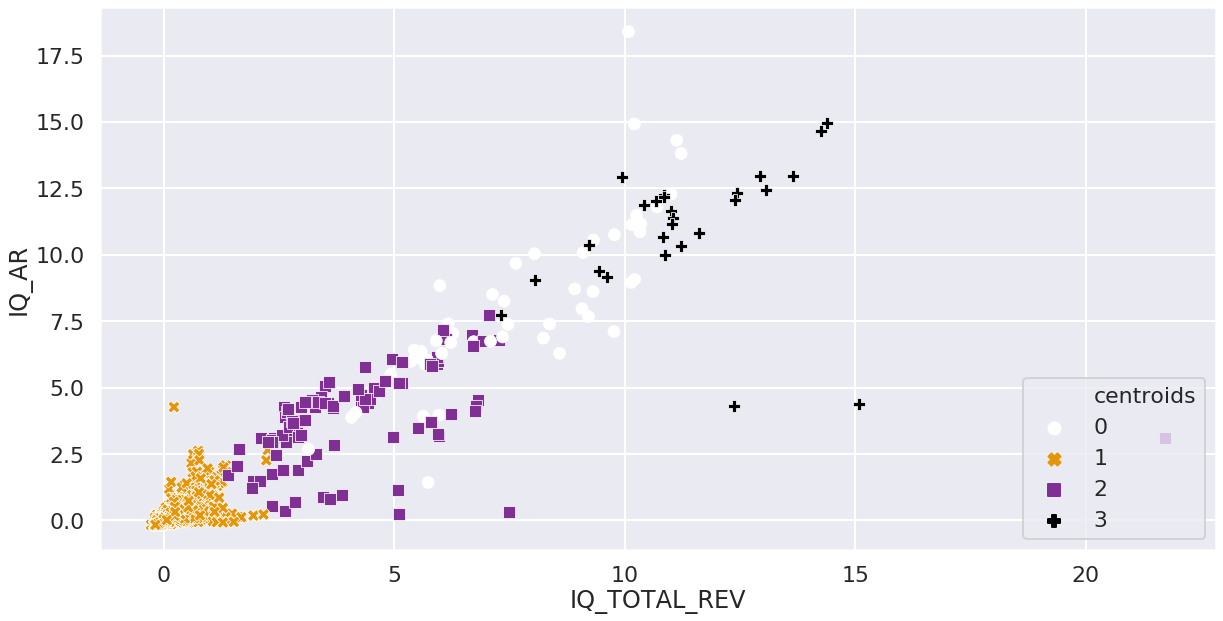

In [13]:
sns.set_context("poster")
sns.set_style("darkgrid")
plt.figure(figsize=(20,10))
ax = sns.scatterplot(x="IQ_TOTAL_REV", y="IQ_AR", hue="centroids",style = "centroids",palette =  "CMRmap_r",data = dataset)

# Provide a dictionary to the palette argument
#ax = sns.scatterplot( x="IQ_EBIT", y="IQ_TOTAL_REV", data=dataset_choosen, fit_reg=False , hue = "centroids" , legend=False, palette=dict(0="#9b59b6", 1="#3498db", 2="#95a5a6" 3 = "#96a5B6"))
 
# Move the legend to an empty part of the plot
plt.legend(loc='lower right')
 
#sns.plt.show()

In [14]:
datasetc = dataset[dataset['centroids']==1]

In [15]:
datasetc.to_csv(r'pivate_public_filecluter1.csv')

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn import metrics

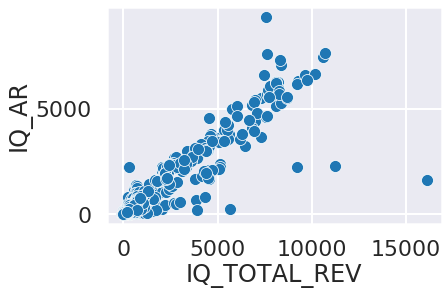

In [17]:
sns.scatterplot(x = dataset1['IQ_TOTAL_REV'],y = dataset1['IQ_AR'], data = dataset1)

In [18]:
y = datasetc.loc[:,"TARGET"]
X  = datasetc.loc[:,"IQ_EBIT":"IQ_TOTAL_ASSETS"].drop("TARGET",axis = 1)
from sklearn.preprocessing import StandardScaler




X_train,X_test = train_test_split(datasetc,test_size=0.2)

In [19]:
X_train.columns
#X_train = pd.DataFrame(X_train)
#X_test = pd.DataFrame(X_test)

In [20]:
# Drop the scaling of Target
y_train = X_train['TARGET']
y_test = X_test['TARGET']
X_train.drop('TARGET',axis=1,inplace = True)
X_test.drop('TARGET',axis=1, inplace = True)

In [21]:
y_train.head()

895    -0.178580
6250   -0.180078
3198   -0.185606
4636   -0.121436
4903   -0.174950
Name: TARGET, dtype: float64

In [22]:
X_train.head()

,company,year,quarter,IQ_EBIT,IQ_TOTAL_OTHER_OPER,IQ_OPER_INC,IQ_TOTAL_REV,IQ_AR,IQ_RE,IQ_TOTAL_ASSETS,IQ_PRIV,IQ_PUB,centroids
895,IQ595624,2011.0,Q4,-0.123039,-0.149918,-0.123039,-0.178257,-0.176910,-0.099562,-0.145702,1,0,1
6250,IQ49919798,2017.0,Q4,-0.124883,-0.162831,-0.124883,-0.181136,-0.175441,-0.092529,-0.140119,0,1,1
3198,IQ1170872,2016.0,Q4,-0.132468,-0.162680,-0.132468,-0.186029,-0.181384,-0.096345,-0.147818,0,1,1
4636,IQ4493082,2010.0,Q4,-0.120174,-0.123120,-0.120174,-0.113694,-0.080825,-0.097213,-0.112481,0,1,1
4903,IQ603707,2015.0,Q4,-0.128041,-0.165634,-0.128041,-0.176842,-0.151628,-0.095814,-0.145143,0,1,1


In [23]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.python.data import Dataset

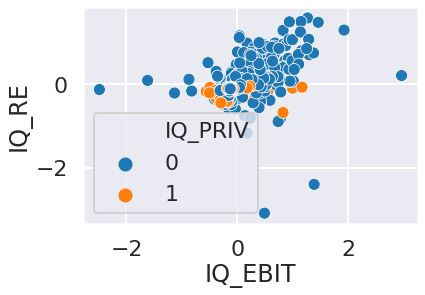

In [24]:
sns.scatterplot(x = 'IQ_EBIT', y = 'IQ_RE',hue = 'IQ_PRIV',data = X_train)

In [25]:
X_train.head()

,company,year,quarter,IQ_EBIT,IQ_TOTAL_OTHER_OPER,IQ_OPER_INC,IQ_TOTAL_REV,IQ_AR,IQ_RE,IQ_TOTAL_ASSETS,IQ_PRIV,IQ_PUB,centroids
895,IQ595624,2011.0,Q4,-0.123039,-0.149918,-0.123039,-0.178257,-0.176910,-0.099562,-0.145702,1,0,1
6250,IQ49919798,2017.0,Q4,-0.124883,-0.162831,-0.124883,-0.181136,-0.175441,-0.092529,-0.140119,0,1,1
3198,IQ1170872,2016.0,Q4,-0.132468,-0.162680,-0.132468,-0.186029,-0.181384,-0.096345,-0.147818,0,1,1
4636,IQ4493082,2010.0,Q4,-0.120174,-0.123120,-0.120174,-0.113694,-0.080825,-0.097213,-0.112481,0,1,1
4903,IQ603707,2015.0,Q4,-0.128041,-0.165634,-0.128041,-0.176842,-0.151628,-0.095814,-0.145143,0,1,1


In [26]:
#Scale the target train and test variable
#y_train = y_train.reshape(len(y_train),1)
#y_test = y_test.reshape(len(y_test),1)
#y_train_scale = scaler_y.fit_transform(y_train)
#y_test_scale = scaler_y.transform(y_test)
#y_train = pd.DataFrame(y_train)
y_train.columns = {'TARGET'}
#y_test = pd.DataFrame(y_test)
y_test.columns = {'TARGET'}

In [27]:
dataset = Dataset.from_tensor_slices((X_train.loc[:,'IQ_EBIT':'IQ_TOTAL_ASSETS'].values,y_train.values))

In [28]:
dataset = dataset.map(lambda window1, window2: ( window1,window2))
#for (window ,window2 )in dataset:
#    print(window.numpy(), window2.numpy())
dataset = dataset.shuffle(buffer_size = 10)
#Batching the data with size 100
dataset = dataset.batch(20).prefetch(1)
#for x,y in dataset:
#   print(x.numpy(),y.numpy())
    


In [29]:
#Linear regression with Tensorflow
l0 = Dense(1,input_shape=[7]) 
model = Sequential([l0])

In [30]:
#Compilation of the model
model.compile(loss="mse",optimizer = SGD(lr=1e-3, momentum= 0.9))
history = model.fit(dataset, epochs = 50)

Epoch 1/50
372/372 [==============================] - 1s 3ms/step - loss: 0.0548
Epoch 2/50
372/372 [==============================] - 0s 1ms/step - loss: 0.0154
Epoch 3/50
372/372 [==============================] - 0s 1ms/step - loss: 0.0091
Epoch 4/50
372/372 [==============================] - 0s 1ms/step - loss: 0.0073
Epoch 5/50
372/372 [==============================] - 0s 1ms/step - loss: 0.0064
Epoch 6/50
372/372 [==============================] - 1s 1ms/step - loss: 0.0056
Epoch 7/50
372/372 [==============================] - 1s 2ms/step - loss: 0.0050
Epoch 8/50
372/372 [==============================] - 1s 1ms/step - loss: 0.0045
Epoch 9/50
372/372 [==============================] - 0s 1ms/step - loss: 0.0040
Epoch 10/50
372/372 [==============================] - 0s 984us/step - loss: 0.0036
Epoch 11/50
372/372 [==============================] - 0s 988us/step - loss: 0.0033
Epoch 12/50
372/372 [==============================] - 0s 1ms/step - loss: 0.0030
Epoch 13/50
372/372 [

In [31]:
print("layer weight {}", format(l0.get_weights()))


layer weight {} [array([[-0.20421481],
       [-0.02417033],
       [ 0.16375723],
       [ 0.9807211 ],
       [-0.02051075],
       [ 0.04698138],
       [ 0.07262833]], dtype=float32), array([0.00089888], dtype=float32)]


In [32]:
forecast = model.predict(X_test.loc[:,'IQ_EBIT':'IQ_TOTAL_ASSETS'].values).flatten()

In [33]:
forecast = scaler.inverse_transform(forecast)

ValueError: operands could not be broadcast together with shapes (1858,) (8,) (1858,) 

In [ ]:
print(forecast)

Exception: Data must be 1-dimensional

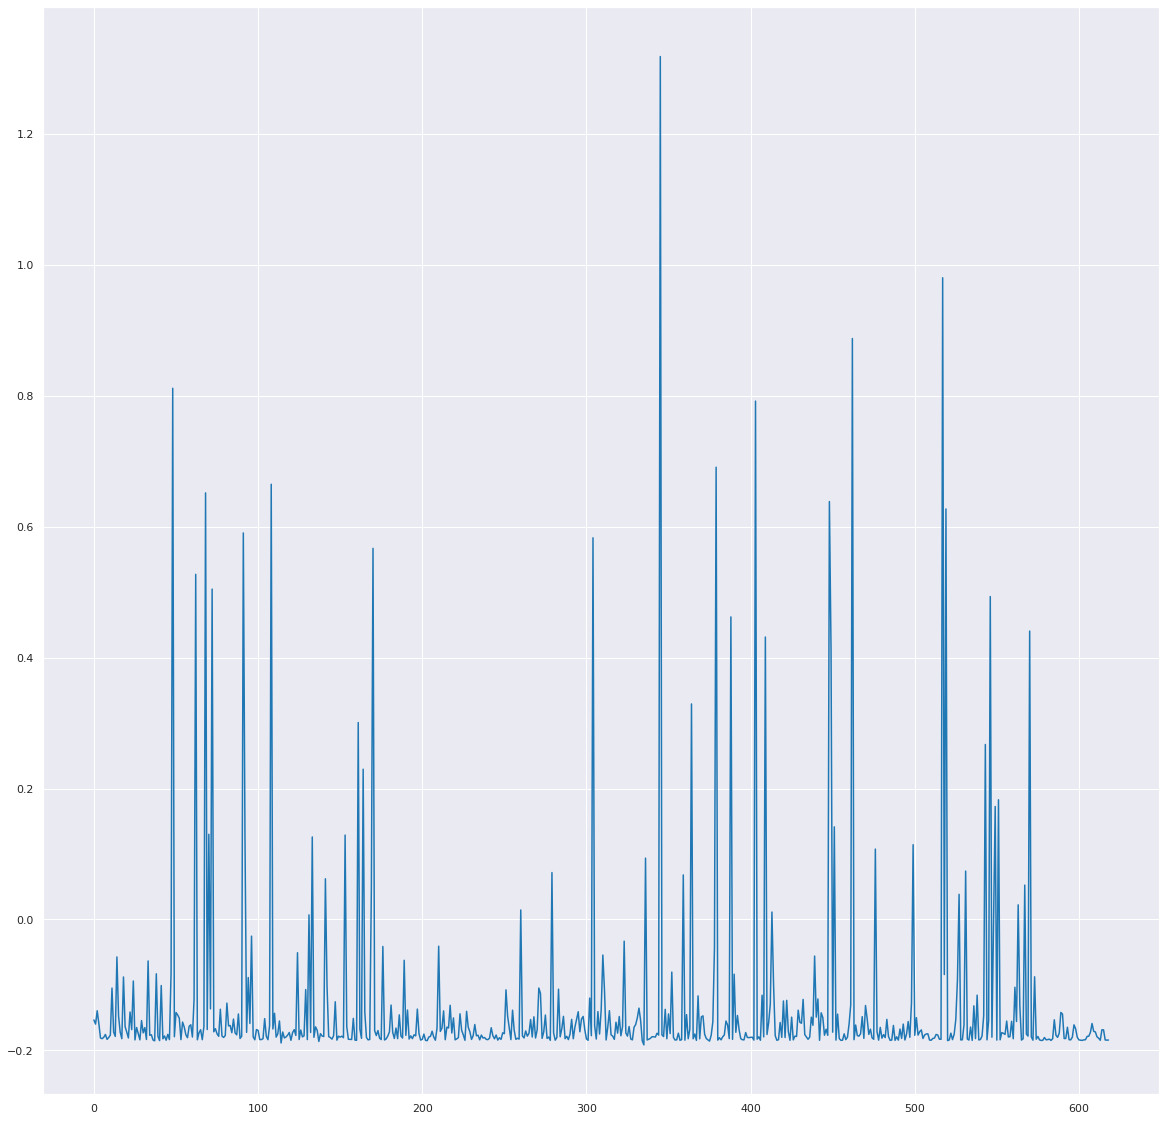

In [34]:
T = round(len(forecast)/3)
x = [i for i in range(T)]
sns.set_context("notebook")
sns.set_style("darkgrid")
plt.figure(figsize=(20,20))
sns.lineplot(x,forecast[0:T])
sns.lineplot(x,y_test.values[0:T])

In [ ]:
tf.keras.metrics.mean_absolute_error(forecast,y_test.values).numpy()